# Data Visualization

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import glob
import random

from scipy import signal

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive', force_remount=False)
! unzip -q "/content/gdrive/MyDrive/Colab Notebooks/CENG501 - Spring2021/Project/data.zip"

Mounted at /content/gdrive


In [ ]:
IQ_PAIR = 512
CLASSES = ['wifi', 'lte', 'nr5g']
NUM_CLASSES = len(CLASSES)

## 1 WiFi Data

In [ ]:
wifi_files = glob.glob("/content/wifi/*.txt")
wifi_df = pd.DataFrame()

for f in sorted(wifi_files):
    csv = pd.read_csv(f, converters={'I+Qi': lambda s: np.complex(s.replace('i', 'j'))})
    wifi_df = wifi_df.append(csv)

## 2 LTE Data

In [ ]:
lte_files = glob.glob("/content/lte/*.txt")
lte_df = pd.DataFrame()

for f in sorted(lte_files):
    csv = pd.read_csv(f, converters={'I+Qi': lambda s: np.complex(s.replace('i', 'j'))})
    lte_df = lte_df.append(csv)

## 3 5G-NR Data

In [ ]:
nr5g_files = glob.glob("/content/nr5g/*.txt")
nr5g_df = pd.DataFrame()

for f in sorted(nr5g_files):
    csv = pd.read_csv(f, converters={'I+Qi': lambda s: np.complex(s.replace('i', 'j'))})
    nr5g_df = nr5g_df.append(csv)

## 4 Visualization



In [ ]:
n = 5000
sample = 256
begin, end = n, n + sample

### 4.1 Time-Domain

In [ ]:
%matplotlib inline
plt.rcParams['figure.figsize'] = [10, 5]
plt.rcParams['figure.dpi'] = 100

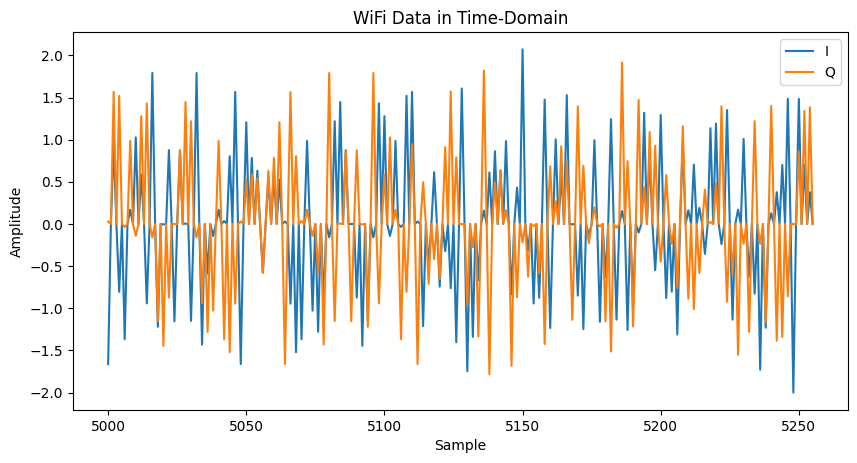

In [ ]:
plt.plot(wifi_df.apply(np.real).iloc[begin:end], label='I')
plt.plot(wifi_df.apply(np.imag).iloc[begin:end], label='Q')
plt.title('WiFi Data in Time-Domain')
plt.xlabel('Sample')
plt.ylabel('Amplitude')
plt.legend()
plt.show()

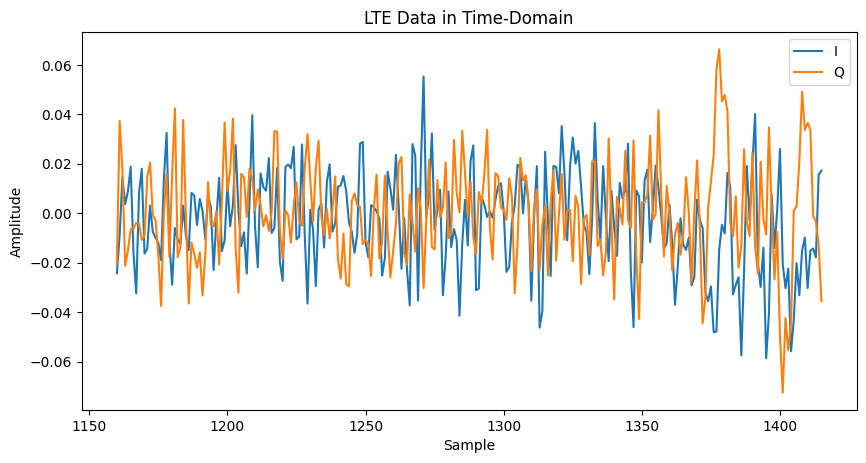

In [ ]:
plt.plot(lte_df.apply(np.real).iloc[begin:end], label='I')
plt.plot(lte_df.apply(np.imag).iloc[begin:end], label='Q')
plt.title('LTE Data in Time-Domain')
plt.xlabel('Sample')
plt.ylabel('Amplitude')
plt.legend()
plt.show()

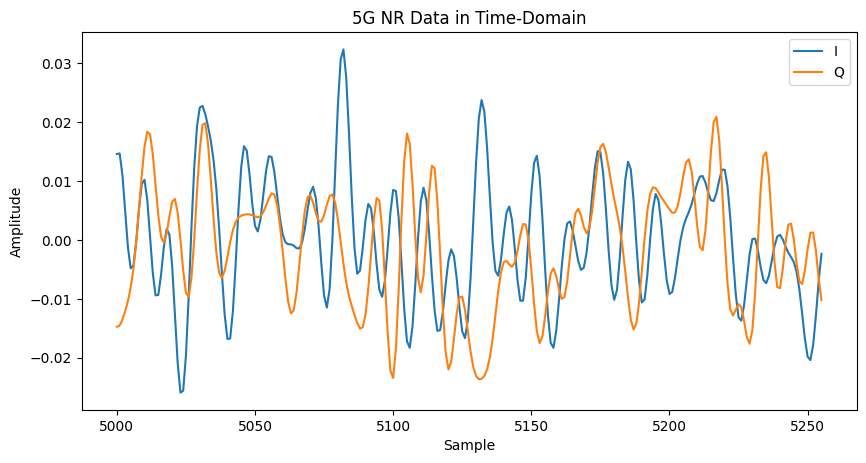

In [ ]:
plt.plot(nr5g_df.apply(np.real).iloc[begin:end], label='I')
plt.plot(nr5g_df.apply(np.imag).iloc[begin:end], label='Q')
plt.title('5G NR Data in Time-Domain')
plt.xlabel('Sample')
plt.ylabel('Amplitude')
plt.legend()
plt.show()

### 4.2 Constellation Scheme

In [ ]:
%matplotlib inline
plt.rcParams['figure.figsize'] = [5, 5]
plt.rcParams['figure.dpi'] = 100

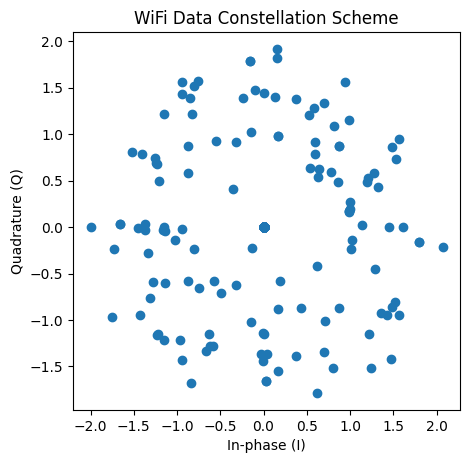

In [ ]:
plt.scatter(wifi_df.apply(np.real).iloc[begin:end], wifi_df.apply(np.imag).iloc[begin:end])
plt.title('WiFi Data Constellation Scheme')
plt.xlabel('In-phase (I)')
plt.ylabel('Quadrature (Q)')
plt.show()

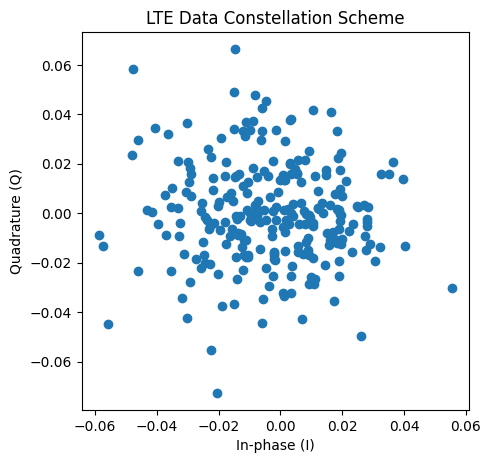

In [ ]:
plt.scatter(lte_df.apply(np.real).iloc[begin:end], lte_df.apply(np.imag).iloc[begin:end])
plt.title('LTE Data Constellation Scheme')
plt.xlabel('In-phase (I)')
plt.ylabel('Quadrature (Q)')
plt.show()

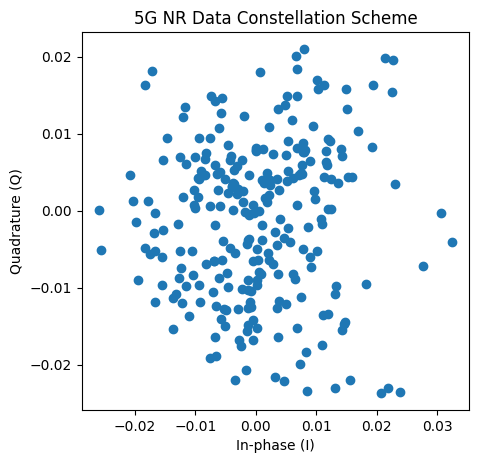

In [ ]:
plt.scatter(nr5g_df.apply(np.real).iloc[begin:end], nr5g_df.apply(np.imag).iloc[begin:end])
plt.title('5G NR Data Constellation Scheme')
plt.xlabel('In-phase (I)')
plt.ylabel('Quadrature (Q)')
plt.show()

### 4.3 Frequency Domain

In [ ]:
%matplotlib inline
plt.rcParams['figure.figsize'] = [12, 5]
plt.rcParams['figure.dpi'] = 100

In [ ]:
def STFT(s, fs=2.4e9, n=IQ_PAIR, axis=1, beta=14):
    kaiser_window = signal.windows.kaiser(n, beta=beta)
    f, t, Zxx = signal.stft(s, fs=fs, window=kaiser_window, nperseg=n, return_onesided=False, axis=axis)
    return f, t, Zxx

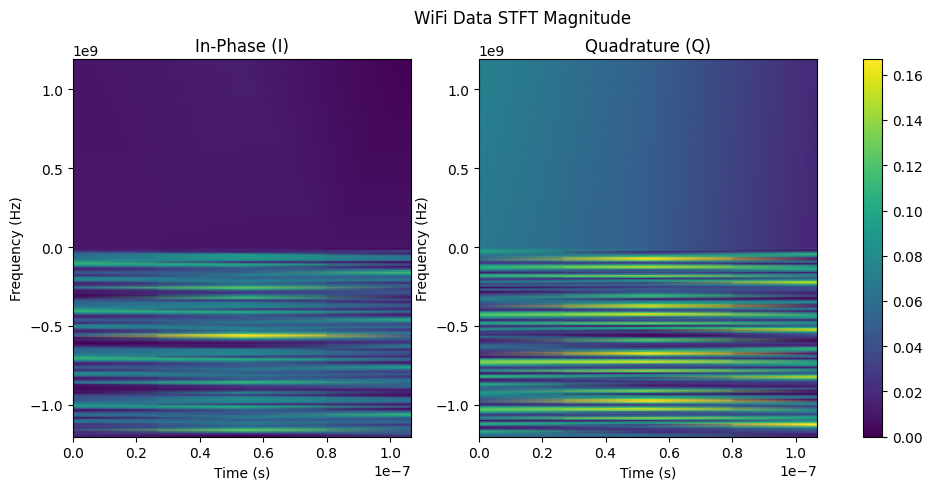

In [ ]:
wifi_signal = wifi_df.iloc[begin:end].to_numpy().reshape(-1)
f, t, Zxx = STFT(wifi_signal, n=sample, axis=-1)

fig, axes = plt.subplots(1, 2)
fig.suptitle('WiFi Data STFT Magnitude')

ax1 = axes.flat[0].pcolormesh(t, f, np.abs(Zxx.real), vmin=0, vmax=np.abs(Zxx.real).max(), shading='gouraud')
axes.flat[0].set_title('In-Phase (I)')
axes.flat[0].set(xlabel='Time (s)', ylabel='Frequency (Hz)')

ax2 = axes.flat[1].pcolormesh(t, f, np.abs(Zxx.imag), vmin=0, vmax=np.abs(Zxx.imag).max(), shading='gouraud')
axes.flat[1].set_title('Quadrature (Q)')
axes.flat[1].set(xlabel='Time (s)', ylabel='Frequency (Hz)')

if np.abs(Zxx.real).max() > np.abs(Zxx.imag).max():
    fig.colorbar(ax1, ax=axes.ravel().tolist())
else:
    fig.colorbar(ax2, ax=axes.ravel().tolist())
fig.show()

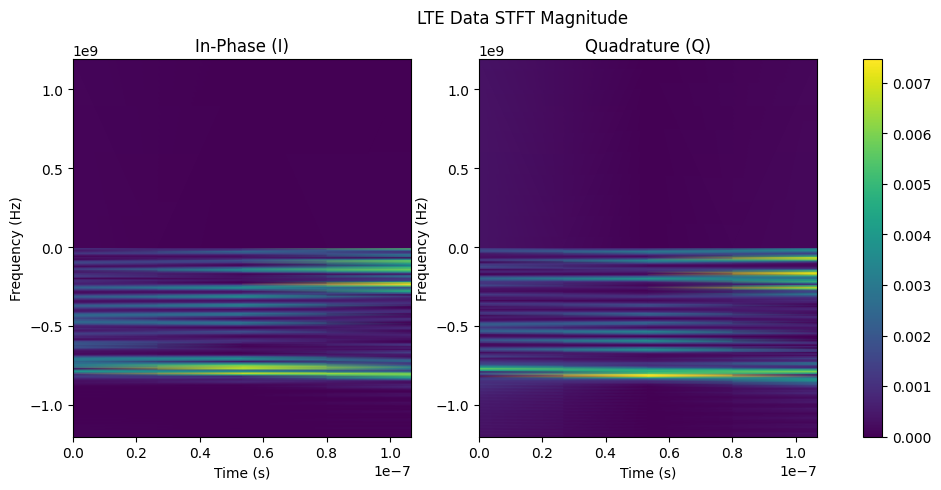

In [ ]:
lte_signal = lte_df.iloc[begin:end].to_numpy().reshape(-1)
f, t, Zxx = STFT(lte_signal, n=sample, axis=-1)

fig, axes = plt.subplots(1, 2)
fig.suptitle('LTE Data STFT Magnitude')

ax1 = axes.flat[0].pcolormesh(t, f, np.abs(Zxx.real), vmin=0, vmax=np.abs(Zxx.real).max(), shading='gouraud')
axes.flat[0].set_title('In-Phase (I)')
axes.flat[0].set(xlabel='Time (s)', ylabel='Frequency (Hz)')

ax2 = axes.flat[1].pcolormesh(t, f, np.abs(Zxx.imag), vmin=0, vmax=np.abs(Zxx.imag).max(), shading='gouraud')
axes.flat[1].set_title('Quadrature (Q)')
axes.flat[1].set(xlabel='Time (s)', ylabel='Frequency (Hz)')

if np.abs(Zxx.real).max() > np.abs(Zxx.imag).max():
    fig.colorbar(ax1, ax=axes.ravel().tolist())
else:
    fig.colorbar(ax2, ax=axes.ravel().tolist())
fig.show()

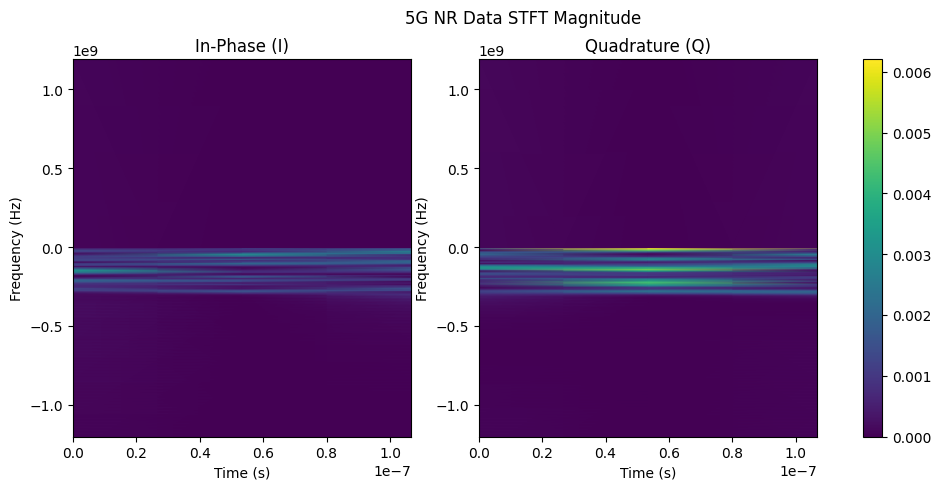

In [ ]:
nr5g_signal = nr5g_df.iloc[begin:end].to_numpy().reshape(-1)
f, t, Zxx = STFT(nr5g_signal, n=sample, axis=-1)

fig, axes = plt.subplots(1, 2)
fig.suptitle('5G NR Data STFT Magnitude')

ax1 = axes.flat[0].pcolormesh(t, f, np.abs(Zxx.real), vmin=0, vmax=np.abs(Zxx.real).max(), shading='gouraud')
axes.flat[0].set_title('In-Phase (I)')
axes.flat[0].set(xlabel='Time (s)', ylabel='Frequency (Hz)')

ax2 = axes.flat[1].pcolormesh(t, f, np.abs(Zxx.imag), vmin=0, vmax=np.abs(Zxx.imag).max(), shading='gouraud')
axes.flat[1].set_title('Quadrature (Q)')
axes.flat[1].set(xlabel='Time (s)', ylabel='Frequency (Hz)')

if np.abs(Zxx.real).max() > np.abs(Zxx.imag).max():
    fig.colorbar(ax1, ax=axes.ravel().tolist())
else:
    fig.colorbar(ax2, ax=axes.ravel().tolist())
fig.show()

## 5. Pre-Processing

In [ ]:
wifi_complex_data = wifi_df.to_numpy()

n, p = wifi_complex_data.shape
n_leftout = n % IQ_PAIR
n_pair = n // IQ_PAIR

if n_leftout == 0:
    wifi_complex_data = wifi_complex_data.reshape(n_pair, IQ_PAIR)
else:
    wifi_complex_data = wifi_complex_data[:-n_leftout].reshape(n_pair, IQ_PAIR)

print(wifi_complex_data.shape)

(14410, 512)


In [ ]:
lte_complex_data = lte_df.to_numpy()

n, p = lte_complex_data.shape
n_leftout = n % IQ_PAIR
n_pair = n // IQ_PAIR

if n_leftout == 0:
    lte_complex_data = lte_complex_data.reshape(n_pair, IQ_PAIR)
else:
    lte_complex_data = lte_complex_data[:-n_leftout].reshape(n_pair, IQ_PAIR)

print(lte_complex_data.shape)

(13972, 512)


In [ ]:
nr5g_complex_data = nr5g_df.to_numpy()

n, p = nr5g_complex_data.shape
n_leftout = n % IQ_PAIR
n_pair = n // IQ_PAIR

if n_leftout == 0:
    nr5g_complex_data = nr5g_complex_data.reshape(n_pair, IQ_PAIR)
else:
    nr5g_complex_data = nr5g_complex_data[:-n_leftout].reshape(n_pair, IQ_PAIR)

print(nr5g_complex_data.shape)

(16170, 512)
